# Summary of neural network exercise

author: Anna Zawadzka

subject: Fundamentos de Sistemas Inteligentes, ULPGC, summer 2020

## Dataset

The dataset used in the exercise is a subset of the <b>Butterfly Images-50 species</b> dataset (https://www.kaggle.com/gpiosenka/butterfly-images40-species) comprising 7 categories: beckers white, cabbage  white, crescent, orange tip, preacock, red admiral and ulyses (ordered as in the figure below). The original dataset was divided in 3 parts: train (ca. 100 examples), test (5 examples) and validation (5 examples) and the same division was applied in the project. 

Data augmentation was used for regular trainining and additionally one comparison looks into how the amount of data augmentation affects the training.

All images were resized to 150x150.

<img src="figures/butterflies.png">

## Procedure

Various configurations of parametres for neural networks were defined, in total 17 NNs. The networks were compared in groups where their configurations only varied in one parameter. The observed features were:
1. Optimizer
2. Number of layers
3. Learning rate
4. Dropout
5. Kernel size
6. Data augmentation

The definition of models can be found in ```NNs.ipynb``` file. The models were saved and loaded in this summary to check the accuracy.

## Accuracy testing

Accuracy testing fo each model was done using ```count_accuracy(model)``` function for test data that had not been seen in training or validation.

In [2]:
from IPython.display import Image
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from numpy import argmax
import matplotlib.pyplot as plt
#import tensorflow as tf
from tensorflow.compat.v1.logging import set_verbosity, ERROR
set_verbosity(ERROR)

%matplotlib inline


test_datagen = ImageDataGenerator(
        rescale=1./255)

data_test = test_datagen.flow_from_directory(
        'butterflies/test',
        target_size=(150, 150),
        batch_size=35,
        class_mode='categorical')

examples, labels = data_test.next()

Found 35 images belonging to 7 classes.


In [3]:
def count_accuracy(model):
    predictions_idx = [argmax(x) for x in model.predict(examples)]
    labels_idx = [argmax(x) for x in labels]
    return sum([a == b for a, b in zip(predictions_idx, labels_idx)]) / len(labels)

In [4]:
few_adadelta = load_model('models/few_adadelta')
few_adam = load_model('models/few_adam')
few_adam_kernel_5x5 = load_model('models/few_adam_kernel_5x5')
few_adam_kernel_7x7 = load_model('models/few_adam_kernel_7x7')
few_adam_large_effect_datagen = load_model('models/few_adam_large_effect_datagen')
few_adam_lr_0_001 = load_model('models/few_adam_lr_0.001')
few_adam_lr_0_01 = load_model('models/few_adam_lr_0.01')
few_adam_lr_0_1 = load_model('models/few_adam_lr_0.1')
few_adam_lr_0_003 = load_model('models/few_adam_lr_0.003')
few_adam_lr_0_03 = load_model('models/few_adam_lr_0.03')
few_adam_no_effect_datagen = load_model('models/few_adam_no_effect_datagen')
many_adadelta = load_model('models/many_adadelta')
many_adam = load_model('models/many_adam')
medium_adadelta = load_model('models/medium_adadelta')
medium_adadelta_no_dropout = load_model('models/medium_adadelta_no_dropout')
medium_adam = load_model('models/medium_adam')
medium_adam_no_dropout = load_model('models/medium_adam_no_dropout')
medium_sgd_lr_0_01 = load_model('models/medium_sgd_lr_0.01')

## 1. Optimizer



Accuracy Adadelta: 	0.829
Accuracy Adam: 		1.000
Accuracy SGD: 		0.914


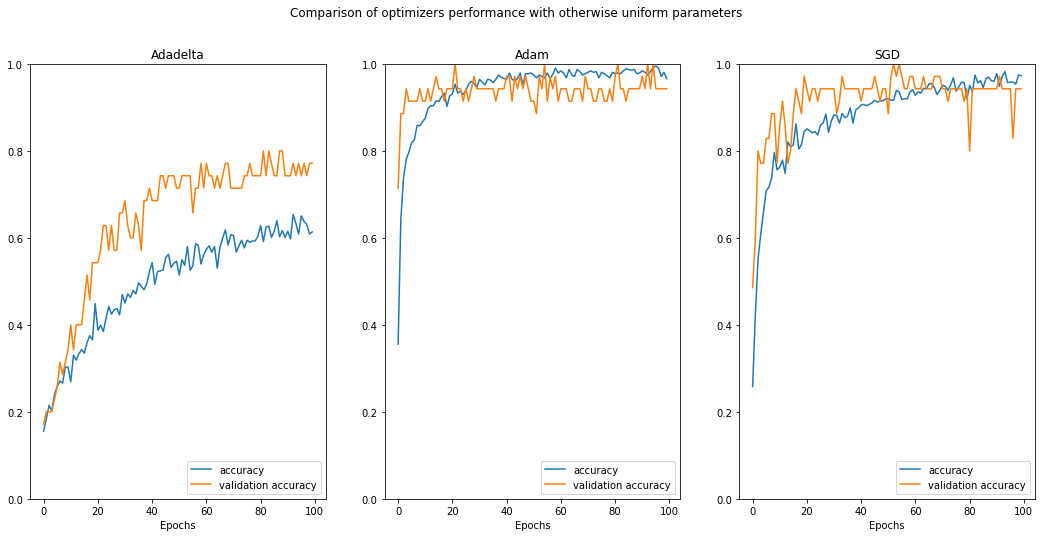

In [5]:
print("Accuracy Adadelta:", "\t{:.3f}".format(count_accuracy(medium_adadelta)))
print("Accuracy Adam:", "\t\t{:.3f}".format(count_accuracy(medium_adam)))
print("Accuracy SGD:", "\t\t{:.3f}".format(count_accuracy(medium_sgd_lr_0_01)))
display(Image(filename='figures/optimizer.png'))

## 2. Number of layers



Accuracy Adam few layers: 		0.914
Accuracy Adam medium number of layers: 	1.000
Accuracy Adam many layers: 		0.943


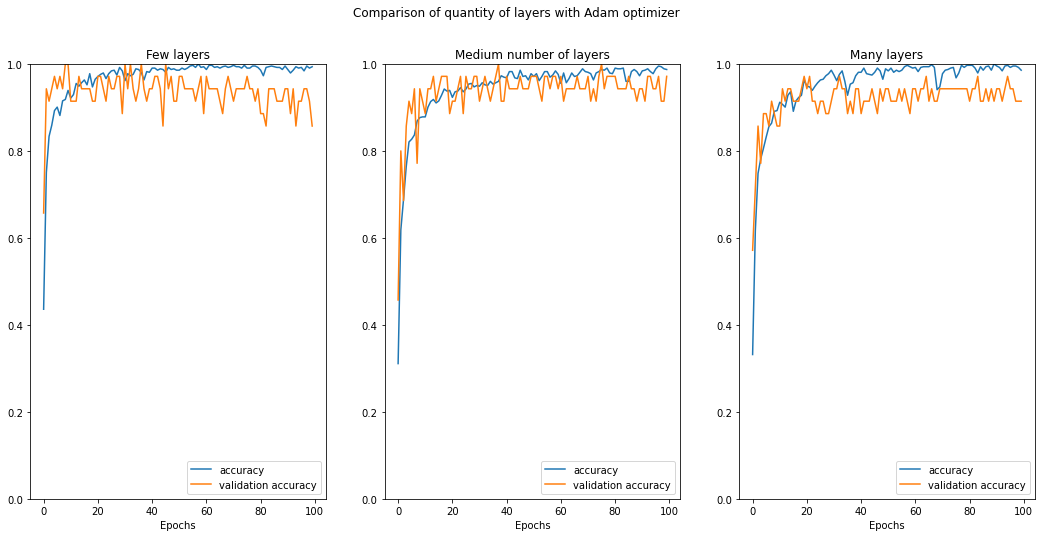

Accuracy Adadelta few layers: 			0.800
Accuracy Adadelta medium number of layers: 	0.829
Accuracy Adadelta many layers: 			0.600


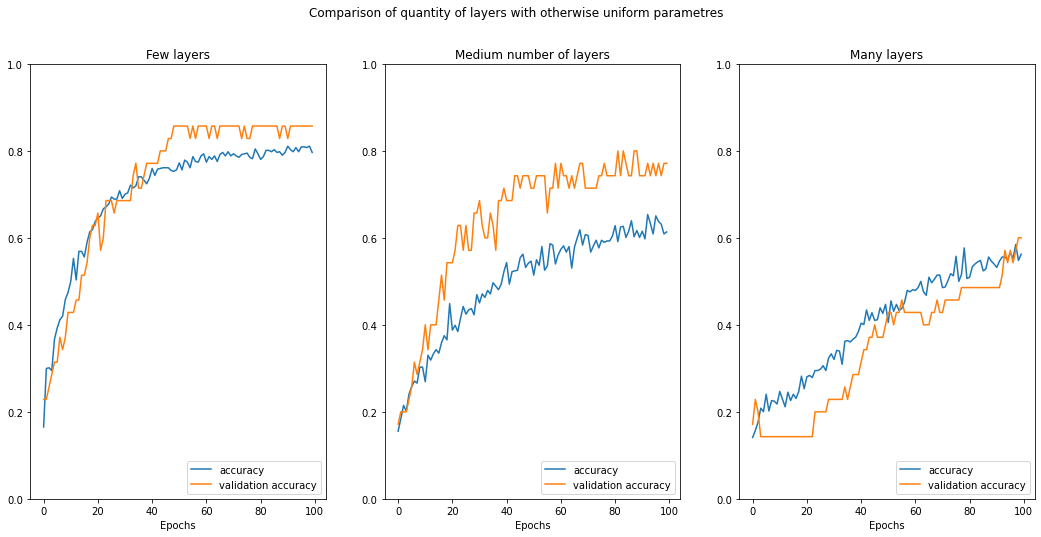

In [6]:
print("Accuracy Adam few layers:", "\t\t{:.3f}".format(count_accuracy(few_adam)))
print("Accuracy Adam medium number of layers:", "\t{:.3f}".format(count_accuracy(medium_adam)))
print("Accuracy Adam many layers:", "\t\t{:.3f}".format(count_accuracy(many_adam)))
display(Image(filename='figures/number_of_layers_adam.png'))

print("Accuracy Adadelta few layers:", "\t\t\t{:.3f}".format(count_accuracy(few_adadelta)))
print("Accuracy Adadelta medium number of layers:", "\t{:.3f}".format(count_accuracy(medium_adadelta)))
print("Accuracy Adadelta many layers:", "\t\t\t{:.3f}".format(count_accuracy(many_adadelta)))
display(Image(filename='figures/number_of_layers_adadelta.png'))

## 3. Learning rate



Accuracy Adam lr=0.1: 		0.143
Accuracy Adam lr=0.03: 		0.143
Accuracy Adam lr=0.01: 		0.800
Accuracy Adam lr=0.003: 	0.914
Accuracy Adam lr=0.001: 	0.886


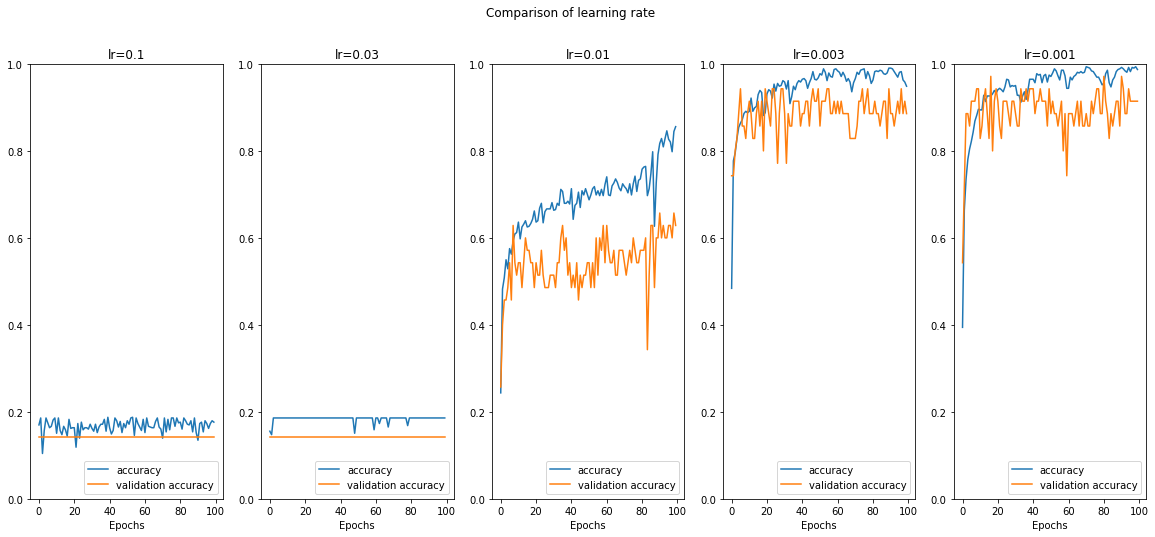

In [7]:
print("Accuracy Adam lr=0.1:", "\t\t{:.3f}".format(count_accuracy(few_adam_lr_0_1)))
print("Accuracy Adam lr=0.03:", "\t\t{:.3f}".format(count_accuracy(few_adam_lr_0_03)))
print("Accuracy Adam lr=0.01:", "\t\t{:.3f}".format(count_accuracy(few_adam_lr_0_01)))
print("Accuracy Adam lr=0.003:", "\t{:.3f}".format(count_accuracy(few_adam_lr_0_003)))
print("Accuracy Adam lr=0.001:", "\t{:.3f}".format(count_accuracy(few_adam_lr_0_001)))
display(Image(filename='figures/learning_rate.png'))

## 4. Dropout



Accuracy Adam dropout: 		1.000
Accuracy Adam no dropout: 	0.943


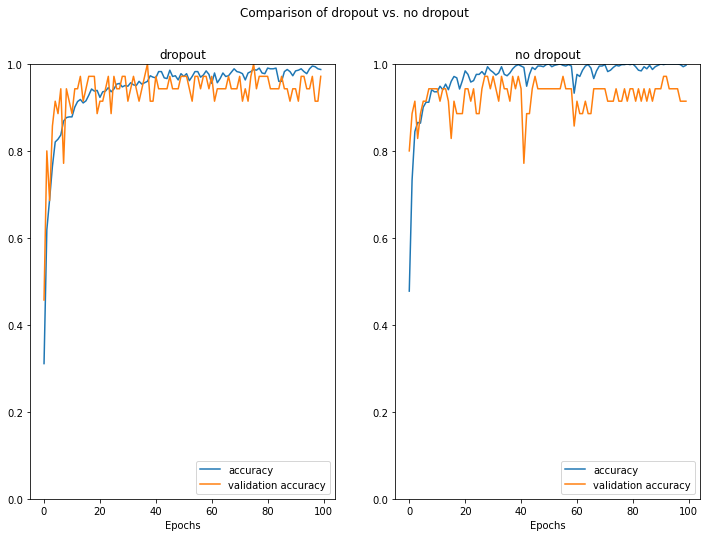

In [8]:
print("Accuracy Adam dropout:", "\t\t{:.3f}".format(count_accuracy(medium_adam)))
print("Accuracy Adam no dropout:", "\t{:.3f}".format(count_accuracy(medium_adam_no_dropout)))
display(Image(filename='figures/dropout.png'))

## 5. Kernel size



Accuracy Adam kernel 3x3: 	0.914
Accuracy Adam kernel 5x5: 	0.971
Accuracy Adam kernel 7x7: 	0.971


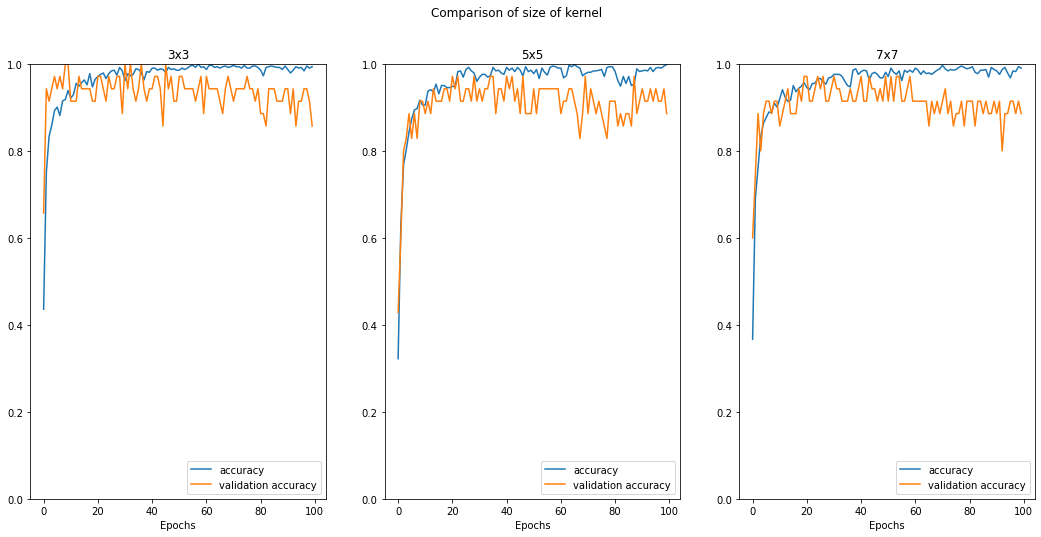

In [9]:
print("Accuracy Adam kernel 3x3:", "\t{:.3f}".format(count_accuracy(few_adam)))
print("Accuracy Adam kernel 5x5:", "\t{:.3f}".format(count_accuracy(few_adam_kernel_5x5)))
print("Accuracy Adam kernel 7x7:", "\t{:.3f}".format(count_accuracy(few_adam_kernel_7x7)))
display(Image(filename='figures/kernel.png'))

## 6. Data augmentation



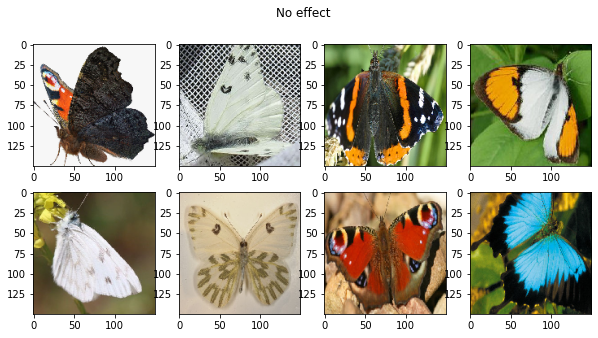

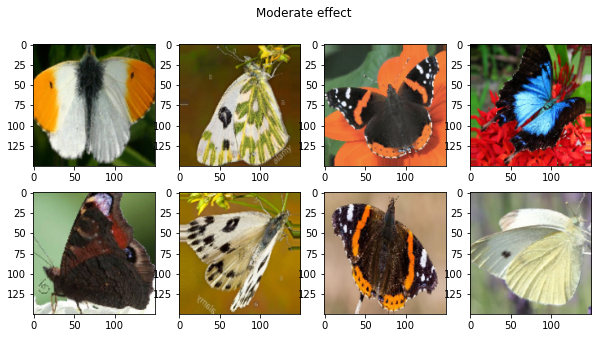

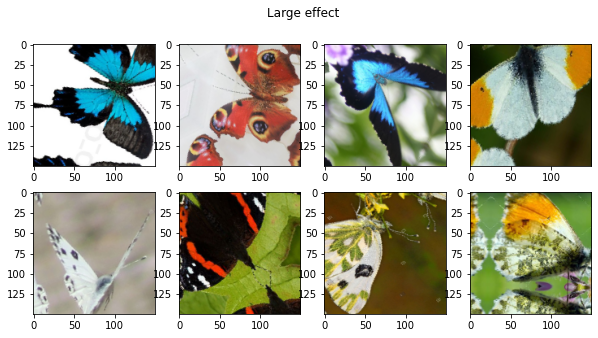

In [10]:
img1 = Image(filename='figures/img_no.png')
img2 = Image(filename='figures/img_mod.png')
img3 = Image(filename='figures/img_lar.png')
display(img1, img2, img3)

Accuracy no effect: 		0.914
Accuracy moderate effect: 	0.914
Accuracy large effect: 		0.829


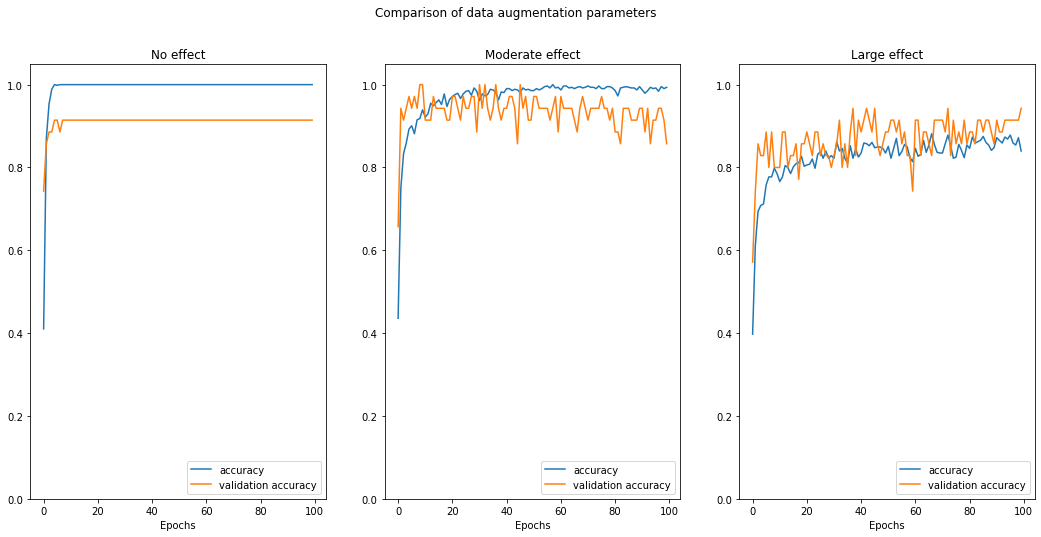

In [11]:
print("Accuracy no effect:", "\t\t{:.3f}".format(count_accuracy(few_adam_no_effect_datagen)))
print("Accuracy moderate effect:", "\t{:.3f}".format(count_accuracy(few_adam)))
print("Accuracy large effect:", "\t\t{:.3f}".format(count_accuracy(few_adam_large_effect_datagen)))
display(Image(filename='figures/data_augmentation.png'))

## Conclusion

Visibly, some parameters in considered cases improve the performance to predict nearly perfectly while some other make it impossible to converge. However, only a fraction of possible combinations of parameters has been tested and the globally optimal configuration may not be composed of parameters of the best performing networks in each comparison. For example, Adam optimizer was used most frequently, but another optimizer may perform even better than the best tested configuration for Adam. 

Despite that, various configurations of parameters performed nearly perfectly on the dataset.

## Answer: Categorical cross-entropy

Categorical cross-entropy computes loss by the following formula (where y is label and y_hat is prediction, M and N are lengths of vectors):
<img src="figures/loss.png">
It takes a single pair of vectors as input: the one-hot data label and the prediction. The assumption of this formula is that only one category can be assigned to each example.

Categorical cross-entropy seeks the difference between two discrete probability distributions, that correspond to vectors of the example label and the prediction. Most y factors are equal to zero and the one that is 1 for the example will take the logarithmic vaule of the prediction probability. The logarithmic function will penalize the false prediction more intensely if its probability is low. The value partial loss computation can be observed in the plot of natural logarithm in the range (0,1) . 

<img src="figures/log.png" width=300>
